### Inspect classes  
Copy symlinks to separate folder for manual inspection

In [1]:
import json
import seaborn as sn
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import shutil

In [2]:
# set up font for export to make it illustrator friendly
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
# import JSON file
with open('/home/aogorodnikov/classif_predict_rgb_augment/Pt04/Pt04.json') as json_file:  
    data = json.load(json_file)

In [4]:
# import JSON file
with open('/home/aogorodnikov/classif_predict_rgb_augment/Pt11/Pt11.json') as json_file:  
    neg = json.load(json_file)

In [5]:
set(data["class_name"])

{'Y',
 'binucleated',
 'confluent',
 'croissant',
 'cytokinesis',
 'large_nuclei',
 'micronuclei',
 'negative',
 'nuclear_mess',
 'other',
 'polarity',
 'spindle'}

In [42]:
lol = [data["img_name"][x] for x in range(len(data["img_name"])) if data["class_name"][x] == 'Y']

In [43]:
lol_neg = [neg["img_name"][x] for x in range(len(neg["img_name"])) if neg["class_name"][x] == 'Y']

In [44]:
class CellStats(object):
    def __init__(self, data):
        wells = [re.search(r'Pt\d+_r\d+c\d+', x)[0] for x in data['img_name']]
        self.well = np.unique(np.array(wells))
        self.n_tot = []
        self.n_pheno = []
        self.norm_counts = []
        
    def count_cells(self, data, selected):
        wells = [re.search(r'Pt\d+_r\d+c\d+', x)[0] for x in data['img_name']]
        selected_wells = [re.search(r'Pt\d+_r\d+c\d+', x)[0] for x in selected]
        for well in self.well:
            n_cells = len([x for x in wells if x == well])
            self.n_tot.append(n_cells)
            n_pheno = len([x for x in selected_wells if x == well])
            self.n_pheno.append(n_pheno)
    def normalize(self, coef = 10e3):
        self.norm_counts = [self.n_pheno[x] * coef / self.n_tot[x] for x in range(len(self.well))]

In [45]:
myObj = CellStats(data=data)
myObj_neg = CellStats(data=neg)

In [46]:
myObj.count_cells(data, lol)
myObj_neg.count_cells(neg, lol_neg)

In [47]:
myObj.normalize()
myObj_neg.normalize()

In [48]:
df = pd.DataFrame(myObj.__dict__)

In [49]:
df_fin = df.append(pd.DataFrame(myObj_neg.__dict__), ignore_index=True)

[Text(0, 0, 'Pt04_r01c01'),
 Text(0, 0, 'Pt04_r01c02'),
 Text(0, 0, 'Pt04_r01c03'),
 Text(0, 0, 'Pt04_r01c04'),
 Text(0, 0, 'Pt04_r01c05'),
 Text(0, 0, 'Pt04_r01c06'),
 Text(0, 0, 'Pt04_r01c07'),
 Text(0, 0, 'Pt04_r01c08'),
 Text(0, 0, 'Pt04_r01c09'),
 Text(0, 0, 'Pt04_r01c10'),
 Text(0, 0, 'Pt04_r01c11'),
 Text(0, 0, 'Pt04_r01c12'),
 Text(0, 0, 'Pt04_r02c01'),
 Text(0, 0, 'Pt04_r02c02'),
 Text(0, 0, 'Pt04_r02c03'),
 Text(0, 0, 'Pt04_r02c04'),
 Text(0, 0, 'Pt04_r02c05'),
 Text(0, 0, 'Pt04_r02c06'),
 Text(0, 0, 'Pt04_r02c07'),
 Text(0, 0, 'Pt04_r02c08'),
 Text(0, 0, 'Pt04_r02c09'),
 Text(0, 0, 'Pt04_r02c10'),
 Text(0, 0, 'Pt04_r02c11'),
 Text(0, 0, 'Pt04_r02c12'),
 Text(0, 0, 'Pt04_r03c01'),
 Text(0, 0, 'Pt04_r03c02'),
 Text(0, 0, 'Pt04_r03c03'),
 Text(0, 0, 'Pt04_r03c04'),
 Text(0, 0, 'Pt04_r03c05'),
 Text(0, 0, 'Pt04_r03c06'),
 Text(0, 0, 'Pt04_r03c07'),
 Text(0, 0, 'Pt04_r03c08'),
 Text(0, 0, 'Pt04_r03c09'),
 Text(0, 0, 'Pt04_r03c10'),
 Text(0, 0, 'Pt04_r03c11'),
 Text(0, 0, 'Pt04_r0

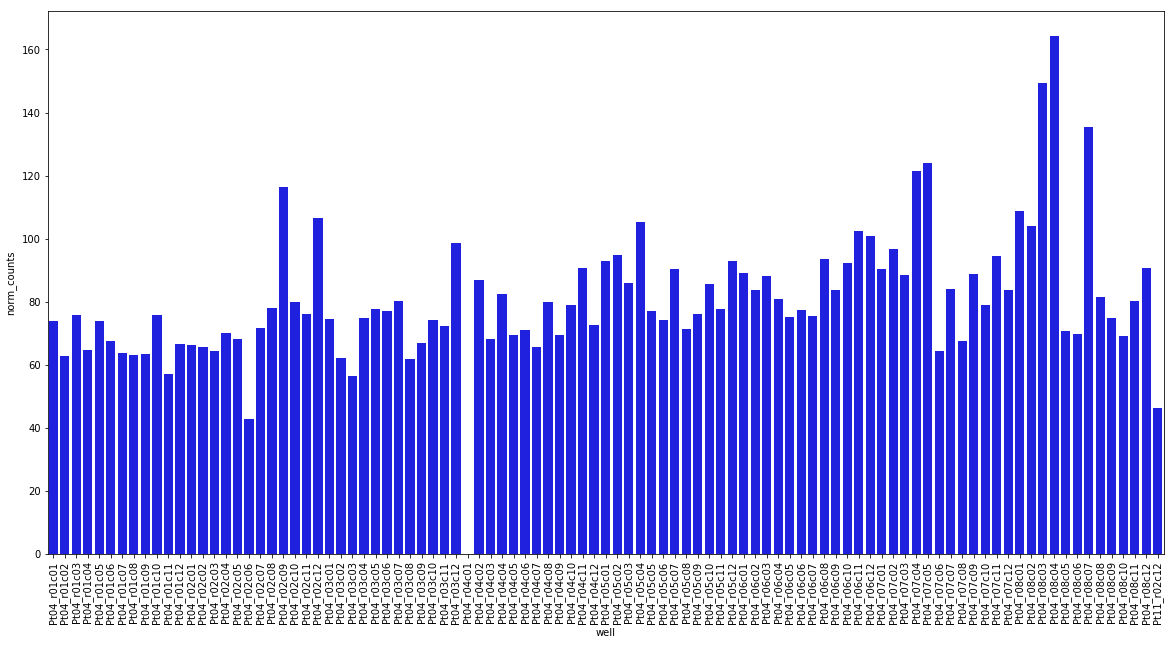

In [50]:
fig, ax = plt.subplots(figsize=(20, 10))
chart = sn.barplot(x="well", y="norm_counts", data=df_fin, color="b")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
#plt.savefig("/home/aogorodnikov/plots/Y.pdf", transparent=True)